In [107]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [108]:
ticker = ['TSLA']
data = pd.DataFrame()
for t in ticker:
    data[t] = wb.DataReader(t, data_source = 'google', start = '2007-1-1', end = '2017-9-11')['Close']
    
log_return = np.log(data.pct_change() + 1)
log_return.tail()

,TSLA
Date,
2017-08-31,0.007672
2017-09-01,-0.001406
2017-09-05,-0.016483
2017-09-08,-0.017865
2017-09-11,0.057406


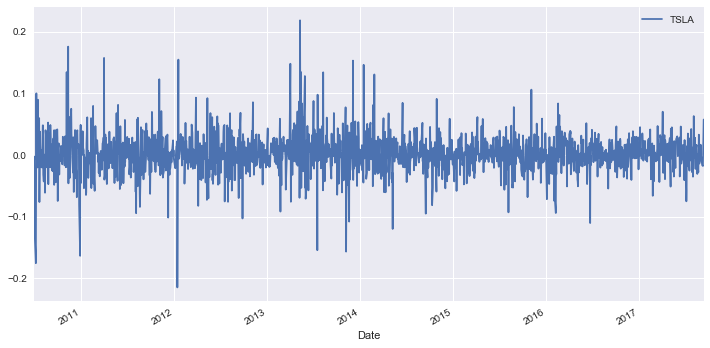

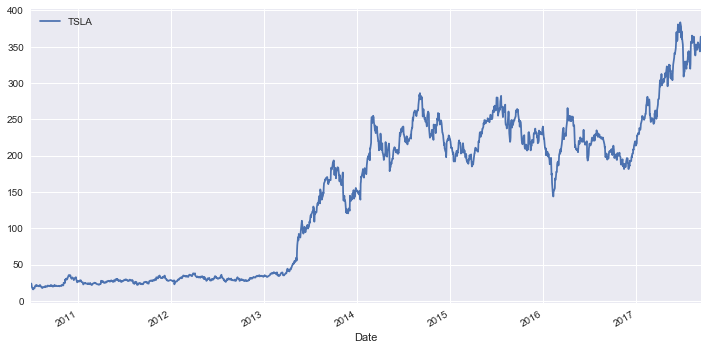

In [109]:
log_return.plot(subplots = True, legend = True, figsize = (12,6))
data.plot(subplots = False, legend = True, figsize = (12,6))
var = log_return.var()
mean = log_return.mean()

In [110]:
stdev = log_return.std()

In [111]:
drift = mean - (0.5 * var)
drift

TSLA    0.000984
dtype: float64

In [112]:
type(drift)


pandas.core.series.Series

In [113]:
type(stdev)

pandas.core.series.Series

In [114]:
type(np.array(drift))

numpy.ndarray

In [115]:
type(drift.values)

numpy.ndarray

In [116]:
stdev.values

array([ 0.03222364])

In [117]:
x = np.random.rand(10,2)
x

array([[ 0.98619025,  0.00310204],
       [ 0.56782082,  0.43652612],
       [ 0.1588827 ,  0.66998965],
       [ 0.79989483,  0.91727985],
       [ 0.28488797,  0.22940898],
       [ 0.42288494,  0.56000653],
       [ 0.4798982 ,  0.1998461 ],
       [ 0.87091892,  0.40207957],
       [ 0.59264889,  0.1647713 ],
       [ 0.62611756,  0.79399187]])

In [118]:
z = norm.ppf(np.random.rand(20,2))
z

array([[-0.91129783,  0.95913268],
       [-0.65161558, -0.58798198],
       [-0.27083485, -1.65349768],
       [-1.37866553, -0.38354614],
       [-1.16122514,  0.49636568],
       [ 1.6275104 ,  0.22009043],
       [ 0.28594265, -1.4510568 ],
       [ 0.86439402,  0.52806972],
       [ 0.10683821,  0.77331669],
       [ 0.28679853, -0.23277031],
       [ 0.97414998, -1.63814393],
       [-0.9884704 ,  1.67904669],
       [ 0.79849189, -1.22916041],
       [-1.02341431, -1.55790169],
       [ 0.76966206, -0.72674392],
       [ 1.77074085,  0.59213152],
       [ 0.82198158,  0.94735752],
       [-0.1103953 ,  0.66787973],
       [-1.05490957,  0.52992845],
       [ 0.67875173,  0.13403951]])

In [119]:
t_intervals = 1000
iterations = 50


In [120]:
daily_returns = np.exp(drift.values + stdev.values *norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[ 0.99290516,  1.01394483,  0.97282314, ...,  1.0151445 ,
         1.03481349,  1.01289428],
       [ 0.94291147,  0.98941667,  0.98953239, ...,  0.95709747,
         0.97491311,  0.92283465],
       [ 1.01197002,  0.95519476,  0.99934533, ...,  0.98421721,
         1.05959205,  1.0494067 ],
       ..., 
       [ 1.00331346,  1.01616253,  0.98778043, ...,  1.00928684,
         1.00352687,  1.02626257],
       [ 1.00061526,  1.02133515,  1.02216821, ...,  1.05509434,
         0.97707951,  0.97140615],
       [ 0.97921202,  0.99132916,  0.98340408, ...,  0.95363454,
         1.03792171,  1.00748251]])

In [121]:
S0 = data.iloc[-1]
S0

TSLA    363.69
Name: 2017-09-11 00:00:00, dtype: float64

In [122]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [123]:
price_list[0] = S0
price_list

array([[ 363.69,  363.69,  363.69, ...,  363.69,  363.69,  363.69],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ..., 
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [124]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [125]:
price_list

array([[  363.69      ,   363.69      ,   363.69      , ...,
          363.69      ,   363.69      ,   363.69      ],
       [  342.92747163,   359.84094715,   359.88303627, ...,
          348.08677945,   354.56615035,   335.62573555],
       [  347.03231938,   343.71818834,   359.64743131, ...,
          342.59299719,   375.69547356,   352.20789562],
       ..., 
       [  670.82425435,  2191.34890106,  1857.40132191, ...,
         3302.66558385,   343.04485105,  4495.01245599],
       [  671.23698684,  2238.10165093,  1898.57658607, ...,
         3484.62376337,   335.18209492,  4366.48275008],
       [  657.28332677,  2218.69542543,  1867.06795779, ...,
         3323.0575766 ,   347.89277281,  4399.15500937]])

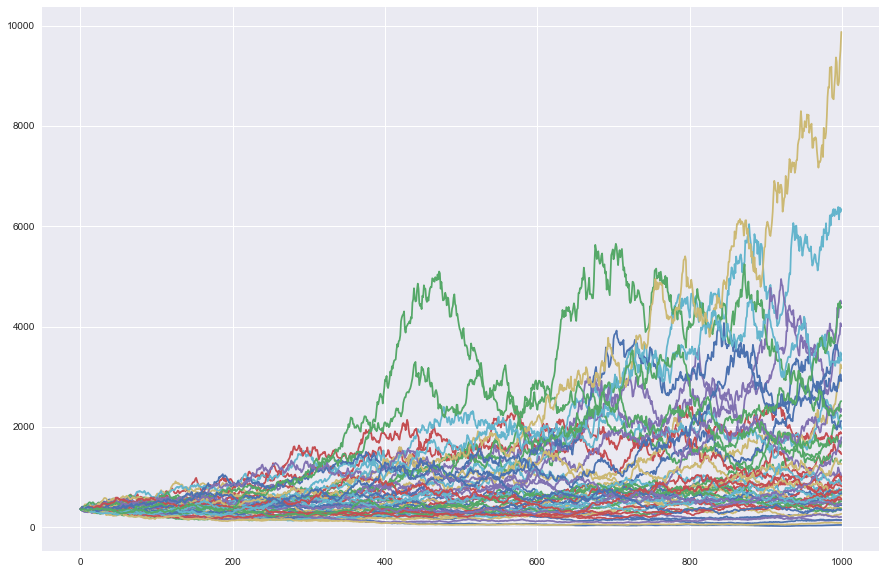

In [126]:
plt.figure(figsize = (15,10))
plt.plot(price_list)
plt.show()